<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/musica/musica_metrica_diversidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métrica **Diversidad de Usuario** en la Música

## Importar los datos
Es necesario agregar el archivo "kaggle.json" disponible en el repositorio al entorno de archivos del Colab:
- https://github.com/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/kaggle.json

El cual son los API de autorización de kaggle para poder descargar los dataset necesarios para la música.

In [1]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!pip install kaggle
!pip install tensorflow
!pip install fastFM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastFM: filename=fastFM-0.2.10-cp310-cp310-linux_x86_64.whl size=591782 sha256=b3b6da51c8fc9803464f34d80392789f507068c65165984c42f95be4d3160e0f
  Stored in directory: /root/.cache/pip/wheels/93/92/52/2da7997fcb7a7ce9042ff3b33836ef0c2fd47aa95382d7a113
Successfully built fastFM


In [3]:
# Descargar el dataset
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("music-dataset-1950-to-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("music_dataset")

print("Path to dataset files: music_dataset")

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
 31% 3.00M/9.73M [00:00<00:00, 29.9MB/s]
100% 9.73M/9.73M [00:00<00:00, 50.5MB/s]
Path to dataset files: music_dataset


In [4]:
# Descargar el dataset de Last.fm
!kaggle datasets download -d harshal19t/lastfm-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("lastfm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lastfm_dataset")

print("Path to dataset files: lastfm_dataset")

Dataset URL: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset
License(s): copyright-authors
  0% 0.00/3.93M [00:00<?, ?B/s]
100% 3.93M/3.93M [00:00<00:00, 56.4MB/s]
Path to dataset files: lastfm_dataset


## Procesamiento de Datasets Musicales
Considerar que se hace un join entre el `music_dataset` y `LastFM`, para obtener datos musicales que tienen metadata y datos de uso por diferentes usuarios.

In [5]:
import pandas as pd

music_data = pd.read_csv("music_dataset/tcc_ceds_music.csv")
lastfm = pd.read_csv("lastfm_dataset/Last.fm_data.csv")

Agregamos una columna `artist_song` para ambas tablas que es el nombre del artista más el nombre de la canción unida por un guíon. Así con esta tabla unimos la infromacion de cada usaurio y su canciones prefereidas con la infromación de esa canción.

In [6]:
#Crear la columna artist song que es el nombre del artista y el nombre de la cancion en minuscula
music_data['artist_song'] = music_data['artist_name'] + "-" + music_data['track_name']
music_data['artist_song'] = music_data['artist_song'].str.lower()

lastfm['artist_song'] = lastfm['Artist'] + "-" + lastfm['Track']
lastfm['artist_song'] = lastfm['artist_song'].str.lower()

Revisamos que no hay valores nulos en ninguna de las tablas originales para ver si se tuvo que haber hecho una limpieza antes. Pero vemos que lo unicos valores NaN son los albums que no importaran para los datos.

In [7]:
# Ver los valores Nan
print(music_data.isnull().sum())
print(lastfm.isnull().sum())

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
artist_song                 0
dtype: int64
Unnamed: 0      0
Username 

Luego hacemos el join o merge para juntar los metadatos de las decisiones de usuario.

In [8]:
# Realizar la unión de los datasets
usuario_music_data = pd.merge(music_data, lastfm, on='artist_song', how='inner')

# Verificar el resultado
print(f"Tamaño del dataset unido: {usuario_music_data.shape}")
usuario_music_data

Tamaño del dataset unido: (8105, 39)


,Unnamed: 0_x,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,topic,age,artist_song,Unnamed: 0_y,Username,Artist,Track,Album,Date,Time
0,250,the clovers,devil or angel,1956,pop,devil mind like devil dear whichever miss miss...,35,0.001698,0.350897,0.001698,...,violence,0.914286,the clovers-devil or angel,78154,franhale,The Clovers,Devil or Angel,The Clovers,23 Jan 2021,12:44
1,331,eddie cochran,completely sweet,1957,pop,completely sweet baby completely sweet mean ma...,73,0.166586,0.001096,0.001096,...,romantic,0.900000,eddie cochran-completely sweet,117435,eartle,Eddie Cochran,Completely Sweet,Singin' to My Baby,30 Jan 2021,13:03
2,705,the byrds,turn! turn! turn! (to everything there is a se...,1959,pop,turn turn turn season turn turn turn time purp...,95,0.000684,0.106944,0.000684,...,night/time,0.871429,the byrds-turn! turn! turn! (to everything the...,80881,franhale,The Byrds,Turn! Turn! Turn! (To Everything There Is a Se...,Turn! Turn! Turn!,31 Jan 2021,13:31
3,729,fats domino,blueberry hill,1959,pop,thrill blueberry blueberry moon stand blueberr...,24,0.003096,0.003096,0.003096,...,romantic,0.871429,fats domino-blueberry hill,16025,Babs_05,Fats Domino,Blueberry Hill,Fats Domino Swings,02 Jan 2021,00:14
4,735,the platters,smoke gets in your eyes,1959,pop,ask know true true course reply inside deny sa...,45,0.001316,0.001316,0.001316,...,sadness,0.871429,the platters-smoke gets in your eyes,16020,Babs_05,The Platters,Smoke Gets In Your Eyes,Remember When?,02 Jan 2021,00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,145081,massdosage,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8101,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,202988,Knapster01,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8102,82439,rakim,when i b on tha mic,2019,hip hop,internationally know hardcore real niggas inte...,58,0.001754,0.001754,0.001754,...,obscene,0.014286,rakim-when i b on tha mic,138926,massdosage,Rakim,When I B On Tha Mic,The Master,31 Jan 2021,19:54
8103,82446,the roots,the seed (2.0),2019,hip hop,knock months finna know want neosoul hiphop wa...,61,0.001224,0.001224,0.105172,...,obscene,0.014286,the roots-the seed (2.0),6390,Babs_05,The Roots,The Seed (2.0),Phrenology,31 Jan 2021,23:55


In [9]:
usuario_music_data.columns

Index(['Unnamed: 0_x', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age', 'artist_song', 'Unnamed: 0_y', 'Username', 'Artist',
       'Track', 'Album', 'Date', 'Time'],
      dtype='object')

In [10]:
# Instalar scikit-learn
!pip install scikit-learn

# Importar el módulo después de instalar
from sklearn.model_selection import train_test_split

# Dividir el dataset en una muestra representativa mínima
# Estratificaremos por 'Username' para garantizar que haya representación de usuarios
train, test = train_test_split(
    usuario_music_data,
    test_size=0.1,  # Reducir a un 10% el tamaño del dataset total
    stratify=usuario_music_data['Username'],
    random_state=42
)

# Verificar tamaños de los subconjuntos
print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de prueba: {test.shape}")

Tamaño del conjunto de entrenamiento: (7294, 39)
Tamaño del conjunto de prueba: (811, 39)


## Categorización de cada usuario
Obtenemos el top k=5 de categorias de cada usuario

In [11]:
# Calcular las K categorías más escuchadas por usuario en el conjunto reducido
k = 3
user_genre_df = train[['Username', 'genre']]

# Top K géneros más escuchados
top_k_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['Username', 'count'], ascending=[True, False])
    .groupby('Username')
    .head(k)
)

# Mostrar los resultados
print("Top K géneros más escuchados por usuario:")
print(top_k_categories)

Top K géneros más escuchados por usuario:
       Username   genre  count
4       Babs_05     pop    821
6       Babs_05    rock    525
0       Babs_05   blues     99
11   Knapster01     pop    619
13   Knapster01    rock    366
7    Knapster01   blues     74
18      Orlenay     pop    240
20      Orlenay    rock    111
14      Orlenay   blues     35
25       eartle     pop    453
27       eartle    rock    267
24       eartle    jazz     63
32     franhale     pop    822
34     franhale    rock    536
28     franhale   blues     95
40        isaac    rock     29
38        isaac     pop     13
37        isaac    jazz      4
43         jajo     pop     10
45         jajo    rock     10
44         jajo  reggae      2
50     jonocole     pop    370
52     jonocole    rock    232
49     jonocole    jazz     82
57  lobsterclaw    rock     10
55  lobsterclaw     pop      8
54  lobsterclaw    jazz      3
62   massdosage     pop    389
64   massdosage    rock    226
61   massdosage    jazz     

# Generar Recomendaciones

Se probará con diferentes métodos de recomendación para evaluar los resultados del modelo:


## Método Most Popular:
Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

### Procesamiento de Datos para Most Popular
Usar el metodo Most popular tomaremos las canciones descargadas/escuhadas por cada usuario como las canciones que quieren cada usaurio. Por lo que agregamos una columna llamada `Popularity` a la tabla de canciones que seria la cantidad de usaurios o veces que se descarga una cancion. Para luego recomendar canciones a cada usuario.


In [12]:
data_music = usuario_music_data[["Username", "artist_song", "genre"]]

In [13]:
# Poner numeros a username para indentificarlos a los artist_song un numero
dict_username = {}
dict_username_reverse = {}
for i, username in enumerate(data_music['Username'].unique()):
    dict_username[username] = i
    dict_username_reverse[i] = username

dict_artist_song = {}
dict_artist_song_reverse = {}
for i, artist_song in enumerate(data_music['artist_song'].unique()):
    dict_artist_song[artist_song] = i
    dict_artist_song_reverse[i] = artist_song

In [14]:
data_music['user_id'] = data_music['Username'].map(dict_username)
data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)
data_music.head()

<ipython-input-14-75271913f1ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['user_id'] = data_music['Username'].map(dict_username)
<ipython-input-14-75271913f1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)


,Username,artist_song,genre,user_id,artist_song_id
0,franhale,the clovers-devil or angel,pop,0,0
1,eartle,eddie cochran-completely sweet,pop,1,1
2,franhale,the byrds-turn! turn! turn! (to everything the...,pop,0,2
3,Babs_05,fats domino-blueberry hill,pop,2,3
4,Babs_05,the platters-smoke gets in your eyes,pop,2,4


Ahora con todos los dataset dividos la data en `train` y `test`. Dejando por usuario una sección del 80% del usuario para el train y un 20% por usuario para el test.

In [15]:
from sklearn.model_selection import train_test_split

data_music_train = []
data_music_test = []

for user in data_music["user_id"].unique():
    user_data = data_music[data_music["user_id"] == user]
    train, test = train_test_split(user_data, test_size=0.2, random_state=42)
    data_music_train.append(train)
    data_music_test.append(test)


# Transformarlo a dataframe
data_music_train = pd.concat(data_music_train)
data_music_test = pd.concat(data_music_test)

In [16]:
data_music_test

,Username,artist_song,genre,user_id,artist_song_id
2604,franhale,peter bjorn and john-young folks,pop,0,973
5229,franhale,between the buried and me-melting city,jazz,0,1939
6266,franhale,faith no more-falling to pieces,rock,0,2360
1551,franhale,mariah carey-fantasy,pop,0,601
7952,franhale,i dont know how but they found me-do it all th...,rock,0,2984
...,...,...,...,...,...
3646,mremond,beach house-space song,pop,10,1283
6942,mremond,foo fighters-learn to fly,rock,10,2592
6745,mremond,depeche mode-home,rock,10,2534
1851,mremond,gillian welch-i'll fly away,pop,10,724


### Obtención de Top K Categorías

Creamos una funcion para obtener los top k de categorias por usuario.

In [17]:
def get_top_k_categories(df, k):
  user_genre_df = df[['Username', 'genre']]

  # Calcular las k categorías más escuchadas por cada usuario
  top_k_5_categories = (
      user_genre_df.groupby(['Username', 'genre'])
      .size()  # Contar ocurrencias de cada género por usuario
      .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
      .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
      .groupby('Username')  # Agrupar por usuario para obtener los top-k
      .head(k)  # Tomar los K géneros más escuchados por usuario
  )

  return top_k_5_categories

### Recomendación de Most Popular

Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

In [18]:
def recommend_most_popular(user, data_train, k=10):
  # Agrugar por canciones contando la cantidad de apariciones
  data_song_count = data_train.groupby('artist_song_id')['artist_song_id'].count().reset_index(name='popularity')
  # Colocar los nombres de las canciones
  data_song_count['artist_song'] = data_song_count['artist_song_id'].map(dict_artist_song_reverse)


  # Ordenar por popularity
  data_song_count = data_song_count.sort_values('popularity', ascending=False)
  top_k_popular_artist_song = data_song_count.head(k)

  top_k_popular_artist_song = top_k_popular_artist_song['artist_song'].tolist()

  return top_k_popular_artist_song



## Método Random
Recomienda canciones de manera aleatoria del conjunto de entrenamiento.
- Selecciona `k` canciones aleatorias
- Usado como baseline para comparaciones
- Debiese mostrar un aumento en la diversidad de las recomendaciones

In [19]:
import random

def recommend_random(user, data_train, k=10):
  # Obtener todas las canciones unicas
  unique_songs = data_train['artist_song'].unique()

  # Seleccionar k canciones aleatorias
  random_songs = random.sample(list(unique_songs), min(k, len(unique_songs)))

  return random_songs



## Método FastFM
FastFM es un modelo basado en Factorization Machines, utilizado para generar recomendaciones. Este enfoque:

- Aprende interacciones latentes entre usuarios y canciones a partir de datos dispersos.
- Es especialmente eficaz para integrar tanto características del usuario como del contenido, además de las interacciones implícitas.
- Emplea técnicas de factorización matricial y optimización eficiente para manejar grandes conjuntos de datos.

In [20]:
from fastFM import sgd
from scipy import sparse


def recommend_fastfm(user, data_train, k=10):
# COLUMNAS: Username,	artist_song, 	genre, 	user_id, 	artist_song_id
  # Creamos matriz de interacción
  us_matrix = pd.pivot_table(
    data_train,
    index='user_id',
    columns='artist_song',
    values='artist_song_id',
    aggfunc='count',
    fill_value=0
  )
  # Expandir matriz en formato largo
  interaction_data = us_matrix.stack().reset_index()
  interaction_data.columns = ['user_id', 'artist_song', 'interaction']
  interaction_data['interaction'] = (interaction_data['interaction'] > 0).astype(int)  # Binarización

  # Crear matriz dispersa para características
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)

  # Etiquetas (1 si hubo interacción, 0 si no)
  y = interaction_data['interaction'].values

  # Creamos el modelo de FastFM fit con primera columna de objetivo.
  ffm = sgd.FMRegression(n_iter=100, rank=2)
  ffm.fit(X, y)

  # Obtener vector del usuario para predicciones
  user_songs = us_matrix.loc[user]
  unseen_songs = user_songs[user_songs == 0].index  # Canciones no escuchadas
  user_data = pd.DataFrame({'user_id': [user] * len(unseen_songs), 'artist_song': unseen_songs})

  # Matriz dispersa para predicciones
  feature_columns = pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).columns
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)
  predicted_ratings = ffm.predict(X_user)

  # Ordenar y seleccionar las mejores recomendaciones
  user_data['predicted_rating'] = predicted_ratings
  top_recommendations = user_data.sort_values('predicted_rating', ascending=False).head(k)['artist_song'].tolist()

  return top_recommendations


## Método DeepFM
DeepFM es un modelo avanzado para sistemas de recomendación que combina lo mejor de las Factorization Machines (FMs) y las redes neuronales profundas (Deep Learning) para capturar interacciones complejas entre características. Este enfoque:

- Factorization Machines (FMs): Capturan de manera eficiente las interacciones de segundo orden entre características, como usuario y canción, especialmente en datos dispersos.
- Redes neuronales profundas: Aprenden interacciones de mayor nivel (no lineales) entre características, mejorando la capacidad del modelo para capturar patrones complejos.
- Integra ambos componentes en un solo modelo, compartiendo los mismos embeddings para reducir la redundancia y optimizar el aprendizaje.

In [21]:
from tensorflow import keras
import tensorflow as tf
import random

# Creamos el modelo de DeepFM
def build_deepfm(input_dim, k=10):
    # Input layer
    print("Input dim:", input_dim)
    input_song = keras.layers.Input(shape=(input_dim,))

    # FM Component
    fm_linear = keras.layers.Dense(1)(input_song)

    # Deep Component - Keep dimensions consistent
    deep = keras.layers.Dense(256, activation='relu')(input_song)
    deep = keras.layers.Dropout(0.2)(deep)
    deep = keras.layers.Dense(128, activation='relu')(deep)
    deep = keras.layers.Dense(64, activation='relu')(deep)
    # Final dense layer should output same shape as input for recommendations
    deep = keras.layers.Dense(input_dim)(deep)

    # Combine Components
    output = keras.layers.Add()([fm_linear, deep])

    # Model
    model = keras.Model(inputs=input_song, outputs=output)
    model.compile(optimizer='adam', loss='mse')
    return model

def recommend_deepfm(user, data_train, k=10):
    # Generate interaction matrix
    us_matrix = pd.pivot_table(
        data_train,
        values='genre',
        index='user_id',
        columns='artist_song',
        aggfunc='count',
        fill_value=0
    )

    print("Matrix shape:", us_matrix.shape)

    # Prepare data
    X = us_matrix.values
    input_dim = X.shape[1]
    # Use full matrix as target
    y = X

    # Train model
    model = build_deepfm(input_dim)
    history = model.fit(X, y, epochs=5, batch_size=32, verbose=1)

    # Generate predictions
    user_vector = us_matrix.loc[user].values.reshape(1, -1)
    predictions = model.predict(user_vector).flatten()

    # Create recommendations dictionary
    songs_dict = dict(zip(us_matrix.columns, predictions))

    # Filter unheard songs
    user_songs = set(data_train[data_train['user_id'] == user]['artist_song'])
    songs_dict = {song: score for song, score in songs_dict.items()
                 if song not in user_songs}

    # Sort and return top k
    sorted_songs = sorted(songs_dict.items(), key=lambda x: x[1], reverse=True)
    return [song for song, _ in sorted_songs[:k]]

## Método IKNN
 Recomienda canciones usando filtrado colaborativo basado en usuarios (IKNN - Item K-Nearest Neighbors).

 - Calcula la similitud entre usuarios basada en las canciones que han escuchado
 - Usa `similitud coseno` para encontrar los k usuarios más similares
 - Recomienda canciones que los usuarios similares han escuchado pero el usuario actual no

In [22]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

class MusicIKNN:
    def __init__(self, k=20):
        self.k = k
        self.item_similarity = None
        self.item_ids = None
        self.user_ids = None

    def _create_user_item_matrix(self, df):
        """
        Crea matriz usuario-item a partir del dataframe
        """
        # Crear mapeos de IDs únicos
        unique_users = df['user_id'].unique()
        unique_items = df['artist_song'].unique()
        self.user_ids = {user: idx for idx, user in enumerate(unique_users)}
        self.item_ids = {item: idx for idx, item in enumerate(unique_items)}

        # Crear matriz de interacciones
        rows = []
        cols = []
        data = []

        for _, row in df.iterrows():
            user_idx = self.user_ids[row['user_id']]
            item_idx = self.item_ids[row['artist_song']]
            rows.append(user_idx)
            cols.append(item_idx)
            data.append(1)  # 1 para indicar interacción

        return csr_matrix((data, (rows, cols)),
                         shape=(len(unique_users), len(unique_items)))

    def fit(self, df):
        """
        Entrena el modelo con el dataframe de interacciones
        """
        # Crear matriz usuario-item
        self.user_item_matrix = self._create_user_item_matrix(df)

        # Calcular similitud entre items
        self.item_similarity = cosine_similarity(self.user_item_matrix.T)
        # Evitar que la similitud consigo mismo sea 1
        np.fill_diagonal(self.item_similarity, 0)

        return self

    def recommend(self, username, df, n_recommendations=10):
        """
        Genera recomendaciones para un usuario
        """
        if username not in self.user_ids:
            print(f"Usuario {username} no encontrado en el dataset")
            return []

        # Obtener índice del usuario
        user_idx = self.user_ids[username]

        # Obtener vector de interacciones del usuario
        user_vector = self.user_item_matrix[user_idx].toarray().flatten()

        # Calcular predicciones
        predictions = self._predict(user_vector)

        # Poner -inf en items ya escuchados
        predictions[user_vector > 0] = float('-inf')

        # Obtener top N recomendaciones
        top_idx = np.argsort(predictions)[::-1][:n_recommendations]

        # Convertir índices a nombres de canciones
        reverse_item_ids = {v: k for k, v in self.item_ids.items()}
        recommendations = [reverse_item_ids[idx] for idx in top_idx]

        return recommendations

    def _predict(self, user_vector):
        """
        Genera predicciones para un vector de usuario
        """
        # Calcular predicciones usando similitud de items
        predictions = np.dot(self.item_similarity, user_vector)

        # Normalizar predicciones
        sim_sums = np.sum(np.abs(self.item_similarity), axis=0)
        sim_sums[sim_sums == 0] = 1  # Evitar división por cero
        predictions = predictions / sim_sums

        return predictions

## Método Híbrido
Método híbrido que combina popularidad con similtud de géneros según parámetro `alpha`.

Basado parcialmente en el [Siguiente Articulo](https://marketsy.ai/blog/hybrid-recommender-systems-beginners-guide).

- `alpha`: Parámetro para balancear entre popularidad global (`1-alpha`) y preferencias de género del usuario (`alpha`)
- Balance entre descubrimiento y relevancia de la recomendación



In [23]:
def recommend_hybrid(user, data_train, k=10, alpha=0.5):
  # Calcular los scores de popularidad de canciones
  popularity_scores = data_train.groupby('artist_song_id')['user_id'].count().to_dict()
  max_popularity = max(popularity_scores.values())
  min_popularity = min(popularity_scores.values())
  normalized_popularity = {song: count/max_popularity for song, count in popularity_scores.items()}

  # Obtener los generos preferidos del usuario
  user_songs = data_train[data_train['user_id'] == user]
  user_genres = user_songs['genre'].value_counts().to_dict()
  total_user_songs = sum(user_genres.values())
  prefered_user_genres = {genre: count/total_user_songs for genre, count in user_genres.items()}

  # Calcular el score combinado hibrido
  hybrid_scores = {}
  for song in data_train['artist_song'].unique():
    # Score de popularidad
    song_popularity = normalized_popularity.get(song, 0)

    # Score de genero
    song_genres = data_train[data_train['artist_song'] == song]['genre'].iloc[0]
    genre_score = prefered_user_genres.get(song_genres, 0)

    # Combinar Scores de popularidad y genero
    hybrid_scores[song] = (1-alpha) * song_popularity + (alpha) * genre_score

  # Filtrar las canciones ya escuchadas
  user_listened = set(user_songs['artist_song_id'])
  hybrid_scores = {song: score for song, score in hybrid_scores.items()
                    if song not in user_listened}

  # Retornar las top k canciones recomendadas
  top_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
  return [song for song, _ in top_recommendations[:k]]

# Calculamos Métricas:


## Metricas de Precisión
- MAP
- NDCG@5
- Precision@10
- Recall@10

In [24]:
def calculate_map(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Inicializar variables
  precision_sum = 0
  relevant_count = 0

  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      relevant_count += 1
      precision_sum += relevant_count / i

  if relevant_count > 0:
    map_value = precision_sum / relevant_count
  else:
    map_value = 0

  return map_value


In [25]:
import math

def calculate_ndcg(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Calcular DCG e IDCG
  dcg = 0
  idcg = 0
  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      dcg += 1 / math.log2(i + 1)
    idcg += 1 / math.log2(i + 1)

  # Calcular NDCG
  if idcg > 0:
    ndcg_value = dcg / idcg
  else:
    ndcg_value = 0

  return ndcg_value


In [26]:
def calculate_precision_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  precision_at_k = relevant_count / len(user_recommendation)

  return precision_at_k

In [27]:
def calculate_recall_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  recall_at_k = relevant_count / len(relevant_items)

  return recall_at_k


## Métricas de Diversidad: ¡Enfoque del Estudio!
- **User Diversity**: Métrica propuesta por la investigación
- Long Tail
- Shannon Entropy
- Intra List Diversity
- Diversity Coverage
- Inverse Propensity Score

### Definición de **USER DIVERSITY**, la métrica de la investigación.
1. `UD = 1 - (|∑{j=1...k}[(R_j/R)*log(R_j/R)]| / log(k))`
2. `k`: número de categorías para un usuario.
3. `R`: número total de recomendaciones.
4. `(R_j/R)`: Proporción de recomendaciones del usuario que pertenecen a la categoría `j`
5. `log(...)`: para penalizar concentración excesiva en una sola categoría.
6. `/ log(k)`: normaliza el valor.
7. `1 - `: Valor resultante entre 0 y 1.
8. *Valor alto*: alta diversidad en las recomendaciones recibidas por el usuario (pertenecen a varias categorías favoritas)

In [28]:
import math

def calculate_user_diversity(user_top_categories, user_recommendation, user_id, k=5):
    user = dict_username_reverse[user_id]
    # Obtener las top k categorías del usuario
    categories_user = user_top_categories[user_top_categories['Username'] == user]['genre'].tolist()[:k]

    # Filtrar recomendaciones para géneros relevantes
    filtered_recommendations = [
        rec for rec in user_recommendation
        if rec in music_data[music_data['genre'].isin(categories_user)]['artist_song'].tolist()
    ]

    # Total de recomendaciones relevantes
    r = len(filtered_recommendations)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Filtrar datos de música para las canciones recomendadas relevantes
    filtered_data = music_data[music_data['artist_song'].isin(filtered_recommendations)]

    # Calcular sum_diversity
    sum_diversity = 0
    for genre in categories_user:
        recommended_songs_genre = filtered_data[filtered_data['genre'] == genre]
        r_j = len(recommended_songs_genre)

        if r_j > 0:
            proportion = r_j / r
            contribution = proportion * math.log(proportion)
            sum_diversity += contribution

    # Normalizar con log(k)
    max_diversity = math.log(k) if k > 1 else 1.0
    # Ponemos en valor absoluto sum_diversity
    sum_diversity = abs(sum_diversity)

    if max_diversity == 0:
        return 0.0  # Si k <= 1, diversidad no tiene sentido

    # Calcular diversidad final
    diversity = 1 - (sum_diversity / max_diversity)

    # Depuración adicional
    return diversity


### **Long Tail**:
Mide que tan diversas son las recomendaciones en términos de popularidad de los items.
1.  Equación: `LT = |Intersection(Rec, TailItems)| / |Rec|`
2. Parametro `beta=0.4`: define umbral para considerar item como parte de la cola larga.
3. *Valor alto*: se recomiendan más items poco populares



In [29]:
def calculate_long_tail(test_data, user_recommendation, user_id, beta_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Procesamos las recomendaciones para obtener la popularidad de los items:
    item_popularity = test_data['artist_song'].value_counts().to_dict()

    # Ordenamos los items por popularidad
    sorted_items = sorted(item_popularity.items(), key=lambda x: x[1], reverse=True)
    n_items = len(sorted_items)
    tail_max = int(beta_value * n_items)

    # Identificamos los items en la LT
    long_tail = set(item for item, _ in sorted_items[tail_max:])

    # Calculamos la proporcion de items recomendades nen la cola larga
    longtail_recommendation = sum(1 for item in user_recommendation if item in long_tail)

    return longtail_recommendation / r


### **Entropía de Shannon**:
Mide la incertidumbre o aleatoriedad de la distribución de recomendaciones.
1. `H = -∑(pi*log2(pi)) / log2(n)`
2. `pi`: probabilidad de cada item en las recomendaciones
3. *Valor alto*: mayor aleatoriedad/diversidad en las recomendaciones.



In [30]:
def calculate_shannon_entropy(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener genero de las canciones recomendadas
    rec_genres = [
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    ]

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Contar la frecuencia de cada genero
    genre_counts = {genre: rec_genres.count(genre) for genre in set(rec_genres)}
    frecuencies = [count/r for count in genre_counts.values()]

    # Calcular la entropia
    entropy = -sum(p * math.log(p, 2) for p in frecuencies)

    # Normalizar con log(r)
    max_entropy = math.log(r) if r > 1 else 1.0
    entropy /= max_entropy

    return entropy

### **Intra List Diversity**:
Calcula diversidad basándose en la similitud entre los items.
1. `ILD = ∑∑(d(i,j)) / (n*(n-1)/2)`
2. `d(i,j)`: es la distancia entre los items `i` y `j`, usando coseno
3. *Valor alto*: mayor diversidad entre los items recomendados.



In [31]:
import numpy as np
def calculate_intra_list_diversity(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r < 2:
        return 0.0

    # Crear one-hot-encoding de caracteristicas basados en generos
    unique_genres = test_data['genre'].unique()
    one_genres = {genre: id_genre for id_genre, genre in enumerate(unique_genres)}

    # Creamos los vectores one_hot
    genre_vectors = []
    for song in user_recommendation:
        song_data = test_data[test_data['artist_song'] == song]
        if len(song_data) > 0:
            genre = song_data['genre'].iloc[0]
            one_hot = [1 if one_genres[genre] == i else 0 for i in range(len(unique_genres))]
            genre_vectors.append(one_hot)

    # Si no hay recomendaciones relevantes, devolver 0
    if len(genre_vectors) < 2:
        return 0.0

    # Calcular matriz de distancias usando distancia coseno
    feature_vectors = np.array(genre_vectors)
    distances = np.dot(feature_vectors, feature_vectors.T)

    # Calcular la diversidad intra-list, considerando la distancia coseno
    n = len(feature_vectors)
    comparisons = (n * (n - 1)) / 2
    intra_list_diversity = np.sum(distances) / (2 * comparisons)

    return intra_list_diversity


### **Diversity Coverage**:
Mide la cobertura como la proporción de items únicos recomendados respceto al total de items posibles.
1. `DC = |Unique_Rec| / |All Items|`
2. *Valor alto*: se están recomendando items de todo el catálogo



In [32]:
def calculate_diversity_coverage(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener generos unicos de las canciones recomendadas
    rec_genres = set(
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    )

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Obtener todos los posibles generos
    all_genres = set(test_data['genre'].unique())

    # Calcular la cobertura de la diversidad
    diversity_coverage = len(rec_genres) / len(all_genres)

    return diversity_coverage

### **Inverse Propensity Score** (IPS):
Penaliza la recomendación de items muy populares
1. `IPS = (1/p(i))`
2. Parametro `lambda` para suavizar la propensidad
3. `p(i)`: probabilidad que el item `i` sea seleccionado
4. *Valor alto*: se están recomendando más items poco probables.

In [33]:
def calculate_inverse_propensity_score(test_data, user_recommendation, user_id, lambda_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0

    # Calcular popularidad de las canciones
    song_popularity = test_data['artist_song'].value_counts().to_dict()
    interaction_count = sum(song_popularity.values())

    # Calcular Propensity Score
    prop_score = {
        song: ((song_popularity[song] + lambda_value) / (interaction_count + lambda_value))
        for song, count in song_popularity.items()
    }

    # Calcular IPS promedio
    ips = [1 / prop_score[song] for song in user_recommendation if song in prop_score]
    if len(ips) > 0:
        ips_avg = sum(ips) / len(ips)
        return ips_avg
    else:
        return 0.0

# Ejecución de Métodos

Creamos una función para ejecutar el modelo con parametros modificables correspondientes a:
- `test_data`: Datos para testeo del modelo
- `train_data`: Datos para entrenamiento del modelo
- `top_n`: Para recommendación *Modelo* (Most Popular, Random, Collaborative, Hibrido)
- `k`: Cuantos clusters de géneros se considerarán para los usuarios
- `beta_lt`: Parametro beta de métrica *Long Tail*, define umbral para considerar un item como parte de la *Long Tail*
- `lambda_ips`: Parámetro de métrica *Inverse Propensity Score*, sirve para suavizar el resultado.


## Método Most Popular

In [34]:
def most_popular_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_most_popular(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método Random

In [35]:
def random_metrcis(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_random(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método IKNN

In [36]:
def IKNN_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    model = MusicIKNN(k=20)
    model.fit(train_data)
    recommend_list = model.recommend(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método FastFM

In [37]:
def fastfm_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_fastfm(userid, train_data, k)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }

## Método Deep FM

In [38]:
def deepfm_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_deepfm(userid, train_data, k)

    user = dict_username_reverse[userid]
    # print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }

## Método hibrido

In [39]:
def hybrid_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_hybrid(userid, train_data, top_n, alpha_hybrid)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


# Ejecución y obtención de métricas

Ahora con las funciones definidas para obtener las metricas las ejecutamos para obtener las metrcicas con 10 recomendaciones por modelo, 5 clusters por usuario, es decir 5 top generos por usuario. La beta para el long tail es de 40% mientras que para ips es de 50%.


### Most Popular Metrics

In [40]:
metric_results = most_popular_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results['MAP']}")
print(f"nDCG: {metric_results['nDCG']}")
print(f"Precision: {metric_results['Precision']}")
print(f"Recall: {metric_results['Recall']}")
print(f"User_Diversity: {metric_results['User_Diversity']}")
print(f"Long_Tail: {metric_results['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results['Inverse_Propensity_Score']}")

MAP: 0.31029942279942285
nDCG: 0.23446691335535422
Precision: 0.23636363636363641
Recall: 0.010080959159261589
User_Diversity: 0.4262802266288572
Long_Tail: 0.0
Shannon_Entropy: 0.6576289144707822
Intra_List_Diversity: 0.40277777777777773
Diversity_Coverage: 0.4285714285714285
Inverse_Propensity_Score: 361.02719256052586


### Método Random

In [41]:
metric_results_random = random_metrcis(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_random['MAP']}")
print(f"nDCG: {metric_results_random['nDCG']}")
print(f"Precision: {metric_results_random['Precision']}")
print(f"Recall: {metric_results_random['Recall']}")
print(f"User_Diversity: {metric_results_random['User_Diversity']}")
print(f"Long_Tail: {metric_results_random['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_random['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_random['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_random['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_random['Inverse_Propensity_Score']}")

MAP: 0.06363636363636363
nDCG: 0.028981265989520576
Precision: 0.02727272727272728
Recall: 0.0009374630074424253
User_Diversity: 0.5116533271655356
Long_Tail: 0.20909090909090908
Shannon_Entropy: 0.341259839903171
Intra_List_Diversity: 0.8984848484848484
Diversity_Coverage: 0.27272727272727265
Inverse_Propensity_Score: 939.4739105339105


### Método FastFM

In [42]:
metric_results_fastfm = fastfm_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_fastfm['MAP']}")
print(f"nDCG: {metric_results_fastfm['nDCG']}")
print(f"Precision: {metric_results_fastfm['Precision']}")
print(f"Recall: {metric_results_fastfm['Recall']}")
print(f"User_Diversity: {metric_results_fastfm['User_Diversity']}")
print(f"Long_Tail: {metric_results_fastfm['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_fastfm['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_fastfm['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_fastfm['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_fastfm['Inverse_Propensity_Score']}")

<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)
<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: All

MAP: 0.0606060606060606
nDCG: 0.0308327459339651
Precision: 0.03636363636363637
Recall: 0.0006007637586584954
User_Diversity: 0.5870512358424906
Long_Tail: 0.05454545454545456
Shannon_Entropy: 0.23971419163218932
Intra_List_Diversity: 0.18181818181818182
Diversity_Coverage: 0.11688311688311685
Inverse_Propensity_Score: 630.8848484848485


<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


### Método DeepFM

In [43]:
metric_results_deepfm = deepfm_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_deepfm['MAP']}")
print(f"nDCG: {metric_results_deepfm['nDCG']}")
print(f"Precision: {metric_results_deepfm['Precision']}")
print(f"Recall: {metric_results_deepfm['Recall']}")
print(f"User_Diversity: {metric_results_deepfm['User_Diversity']}")
print(f"Long_Tail: {metric_results_deepfm['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_deepfm['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_deepfm['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_deepfm['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_deepfm['Inverse_Propensity_Score']}")

Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6543
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.4055
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3116
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3233
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
User: franhale - Recommended: ['céline dion-i drove all night', 'creedence clearwater revival-born to move', 'isaac hayes-theme from shaft', 'archers of loaf-web in front', 'joni mitchell-river']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.8301
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4557
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4749
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3788
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
User: eartle - Re

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
User: jonocole - Recommended: ['blondie-call me', 'mazzy star-flowers in december', "zz top-gimme all your lovin'", 'santana-hold on', 'damien rice-9 crimes']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9383
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4353
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3186
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3858
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4195


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
User: massdosage - Recommended: ['electric light orchestra-mr. blue sky', 'deftones-entombed', 'bob dylan-most of the time', 'azealia banks-212', 'adelitas way-notorious']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.7499
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.5292
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.4241
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2875
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
User: Orlenay - Recommended: ['frankie goes to hollywood-war', 'thievery corporation-all that we perceive', 'hot chip-ready for the floor', "the mamas & the papas-california dreamin'", 'placebo-every you every me']
Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0341
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3430
Epoch 3/5
1/1 ━

### Método IKNN

In [44]:
metric_results_IKNN = IKNN_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_IKNN['MAP']}")
print(f"nDCG: {metric_results_IKNN['nDCG']}")
print(f"Precision: {metric_results_IKNN['Precision']}")
print(f"Recall: {metric_results_IKNN['Recall']}")
print(f"User_Diversity: {metric_results_IKNN['User_Diversity']}")
print(f"Long_Tail: {metric_results_IKNN['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_IKNN['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_IKNN['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_IKNN['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_IKNN['Inverse_Propensity_Score']}")

MAP: 0.14126984126984127
nDCG: 0.04818146792137012
Precision: 0.045454545454545456
Recall: 0.0020913248460744144
User_Diversity: 0.4333816137144146
Long_Tail: 0.11818181818181821
Shannon_Entropy: 0.21506569755732616
Intra_List_Diversity: 0.5303030303030304
Diversity_Coverage: 0.20779220779220775
Inverse_Propensity_Score: 906.8969696969697


### Método Hibrido

In [45]:
metric_results_hybrid = hybrid_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_hybrid['MAP']}")
print(f"nDCG: {metric_results_hybrid['nDCG']}")
print(f"Precision: {metric_results_hybrid['Precision']}")
print(f"Recall: {metric_results_hybrid['Recall']}")
print(f"User_Diversity: {metric_results_hybrid['User_Diversity']}")
print(f"Long_Tail: {metric_results_hybrid['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_hybrid['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_hybrid['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_hybrid['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_hybrid['Inverse_Propensity_Score']}")

MAP: 0.13737373737373737
nDCG: 0.06856238557155644
Precision: 0.07272727272727274
Recall: 0.003261733099983584
User_Diversity: 0.9717347720834026
Long_Tail: 0.22727272727272727
Shannon_Entropy: 0.22946593944702387
Intra_List_Diversity: 1.1818181818181817
Diversity_Coverage: 0.1558441558441558
Inverse_Propensity_Score: 804.3781818181818


# Ejecución Global de Métodos


## Definición Función Global de Ejecución
Definimos una función global para calcular todas las metricas para todos los modelos.

In [46]:
def global_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  model_iknn = MusicIKNN(k=20)
  model_iknn.fit(train_data)

  # Arreglo para almacenar los resultados de cada metodo
  records = []

  # Obtenemos las top k categorias
  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():
    # Genero recomendaciones para cada modelo
    recommendations = {
        'most_popular': recommend_most_popular(userid, train_data, top_n),
        'random': recommend_random(userid, train_data, top_n),
        'iknn': model_iknn.recommend(userid, train_data, top_n),
        'fastfm': recommend_fastfm(userid, train_data, top_n),
        'deepfm': recommend_deepfm(userid, train_data, top_n),
        'hybrid': recommend_hybrid(userid, train_data, top_n, alpha_hybrid),
    }

    # Calcular Metricas para cada modelo
    for model, recommend_list in recommendations.items():
      record = {
        'user_id': userid,
        'model': model,
          # Metricas de precision
        'MAP': calculate_map(test_data, recommend_list, userid),
        'nDCG': calculate_ndcg(test_data, recommend_list, userid),
        'Precision': calculate_precision_at_k(test_data, recommend_list, userid),
        'Recall': calculate_recall_at_k(test_data, recommend_list, userid),
          # Metricas de diversidad
        'User_Diversity': calculate_user_diversity(top_k_categories_data, recommend_list, userid),
        'Long_Tail': calculate_long_tail(test_data, recommend_list, userid, beta_lt),
        'Shannon_Entropy': calculate_shannon_entropy(test_data, recommend_list, userid),
        'Intra_List_Diversity': calculate_intra_list_diversity(test_data, recommend_list, userid),
        'Diversity_Coverage': calculate_diversity_coverage(test_data, recommend_list, userid),
        'Inverse_Propensity_Score': calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)
      }
      records.append(record)

  # Promedio de métricas
  results_df = pd.DataFrame(records)
  #print(results_df.head())

  return results_df


In [47]:
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
results_df.head()

<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7950
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8440
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4590
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3759
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4369
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9958
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5684
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5311
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3942
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2980
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5843
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.6476
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.6385
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.7127
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4269
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2790
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3148
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3169
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2929
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.6440
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4972
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6391
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6988
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.9585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4495
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.6538
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.4281
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4282
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4495
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.5848
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3566
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2660
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.3688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4852
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2959
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3153
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3447
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7211
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.5051
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4932
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3476
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6950
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5338
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4586
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6706
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9293
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3880
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4204
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.4428
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


,user_id,model,MAP,nDCG,Precision,Recall,User_Diversity,Long_Tail,Shannon_Entropy,Intra_List_Diversity,Diversity_Coverage,Inverse_Propensity_Score
0,0,most_popular,0.844444,0.752969,0.7,0.019553,0.344541,0.0,0.657629,0.402778,0.428571,361.027193
1,0,random,0.125000,0.069431,0.1,0.002793,0.209023,0.1,0.288539,1.000000,0.285714,1084.333333
2,0,iknn,0.000000,0.000000,0.0,0.000000,0.118647,0.1,0.288539,1.000000,0.285714,867.466667
3,0,fastfm,0.000000,0.000000,0.0,0.000000,0.394624,0.1,0.144270,0.000000,0.142857,1084.333333
4,0,deepfm,0.488889,0.312529,0.3,0.008380,0.472682,0.2,0.490219,0.500000,0.428571,867.466667


## Analisis Global de Metricas
Analiza y visualiza los resultados de las métricas globales usando el Dataframe

### Generar visualizaciones comparativas entre los modelos
Creamos 3 tipos de gráficos para las visualizaciones:
1. Gráfico de cajas para cada métrica mostrando su distribución.
2. Heatmap de correlaciones entre métricas.
3. Gráfico de radar para comparar modelos.

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_global_metrics(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall' , 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']

  # Configurar el estilo usando seaborn
  sns.set_style

  # Crear el gráfico de cajas para cada metrica
  fig, axes = plt.subplots(3, 4, figsize=(20, 10))
  fig.suptitle('Distribución de Métricas por Modelo', fontsize=16)

  for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

  plt.tight_layout()
  plt.show()

  # Generar heatmap de correlaciones entre métricas
  correlation_matrix = results_df[metrics].corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlación entre Métricas')
  plt.tight_layout()
  plt.show()

  # Grafico de radar para comparar modelos
    # Calcular promedios de las metricas normalizados
  avg_metrics = results_df.groupby('model')[metrics].mean()
  normalized_metrics = (avg_metrics - avg_metrics.min()) / (avg_metrics.max() - avg_metrics.min())

    # Configuramos grafico de radar: https://plotly.com/python/radar-chart/
  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
  angles = np.concatenate((angles, [angles[0]]))

    # Graficamos las metricas
  for model in normalized_metrics.index:
    values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

    # Configuramos etiquetas
  ax.set_xticks(angles[:-1], metrics)
  ax.set_ylim(0, 1)
  plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05))
  plt.title('Comparación de Métodos según Métricas Normalizadas')
  # plt.tight_layout()
  plt.show()

### Generar Análisis Estadístico de Significancia
Realiza un análisis estadístico de las diferencias entre modelos, incluyendo:
1. Media y desviación estándar por modelo.
2. Test ANOVA para evaluar la significancia estadística
3. Correlaciones entre las métricas


In [49]:
from scipy import stats

def analyze_significance(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
  # Calcular promedios de las metricas
  avg_metrics = results_df.groupby('model').mean()
  print("Promedios de Métricas por modelo:")
  print(avg_metrics.round(4))

  # Calcular desviaciones estandar
  std_metrics = results_df.groupby('model').std()
  print("Desviaciones estandar de Métricas por modelo:")
  print(std_metrics.round(4))

  # Calcular Test de ANOVA
  # Generamos grupos de comparacion segun modelos
  anova_results = {}
  for metric in metrics:
    groups = [group for _, group in results_df.groupby('model')[metric]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'Estadistico-F': f_value, 'Valor-P': p_value}

  # Creo un dataframe con los resultados
  anova_df = pd.DataFrame(anova_results).T
  print("Resultados ANOVA:")
  print(anova_df.round(4))


## Generar Resultados Finales

In [50]:
def analyze_global_metrics(results_df):
  # Preparar e imprimir las visualizaciones usando nuestra funcion
  visualize_global_metrics(results_df)

  # Analisis estadistico usando nuestra funcion
  analyze_significance(results_df)

### Testeo de Parámetros para Ejecución Global
Queda ejecutado con parámetros:
- top_n = 10
- k = 5
- alpha_hybrid=0.5
- beta_lt=0.4
- lambda_ips=0.5


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.6810
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8153
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4192
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3475
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0665
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4264
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3169
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3871
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4789
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4908
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3726
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2657
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.7730
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.5239
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3599
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3076
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.3704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7957
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6917
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5442
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6588
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5779
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.6157
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.5192
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.5958
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5562
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.2190
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5028
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5156
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4964
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4711
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.4190
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3320
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.3280
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3748
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4471
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2749
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3462
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6289
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3947
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3097
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.3249
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4519
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4057
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2783
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.3253
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-48-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-48-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-48-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-48-e13b0fbe4920>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
<ipython-input-48-e13b0f

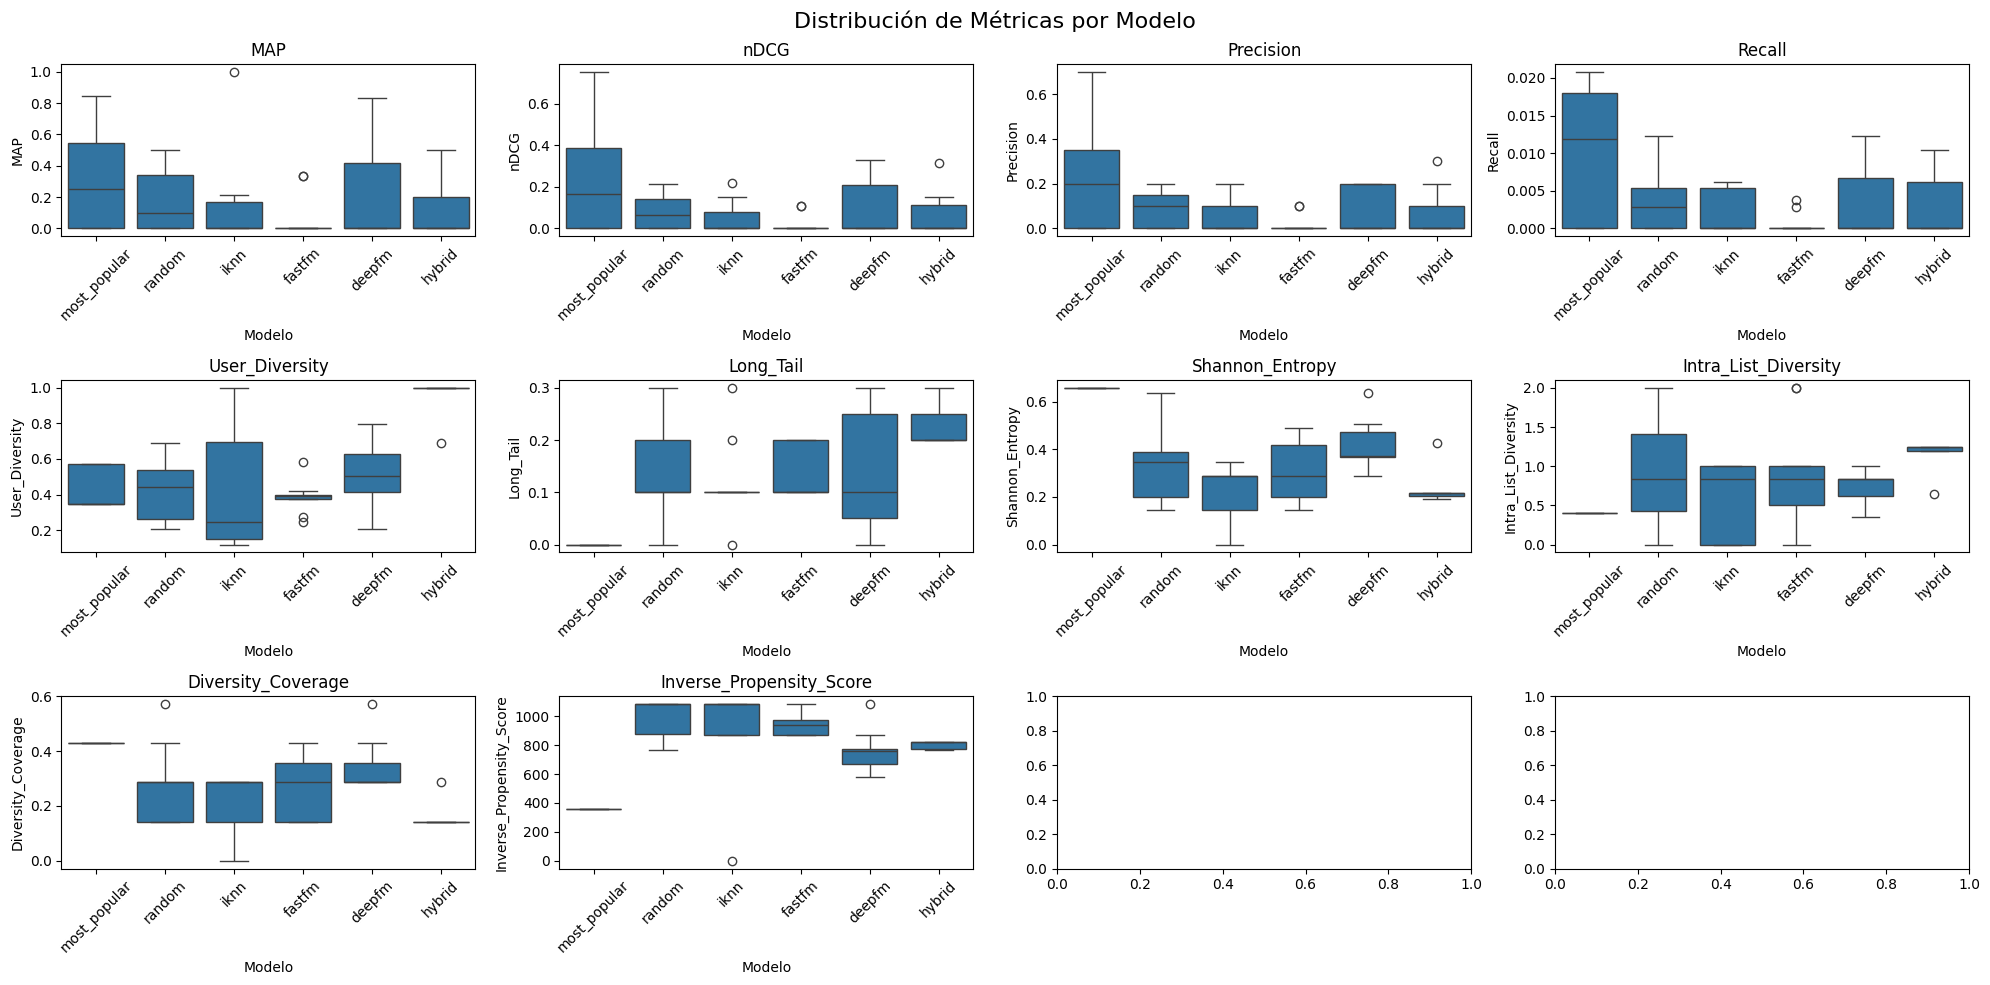

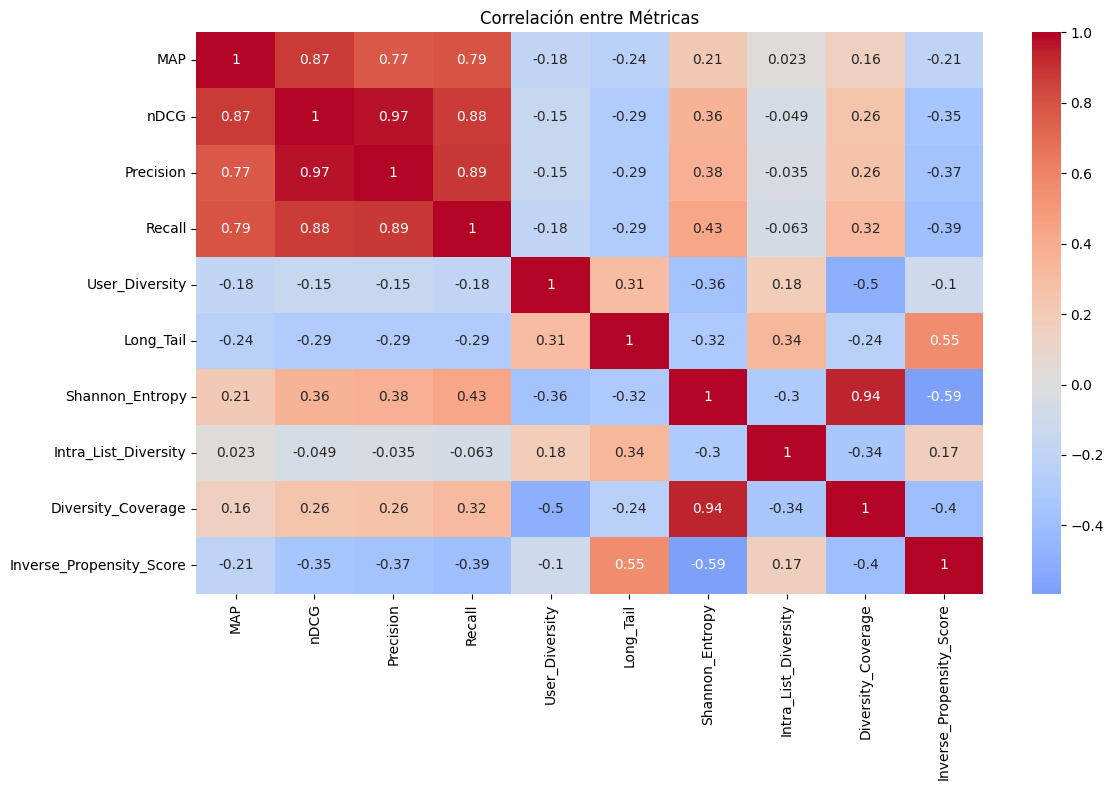

<ipython-input-48-e13b0fbe4920>:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))


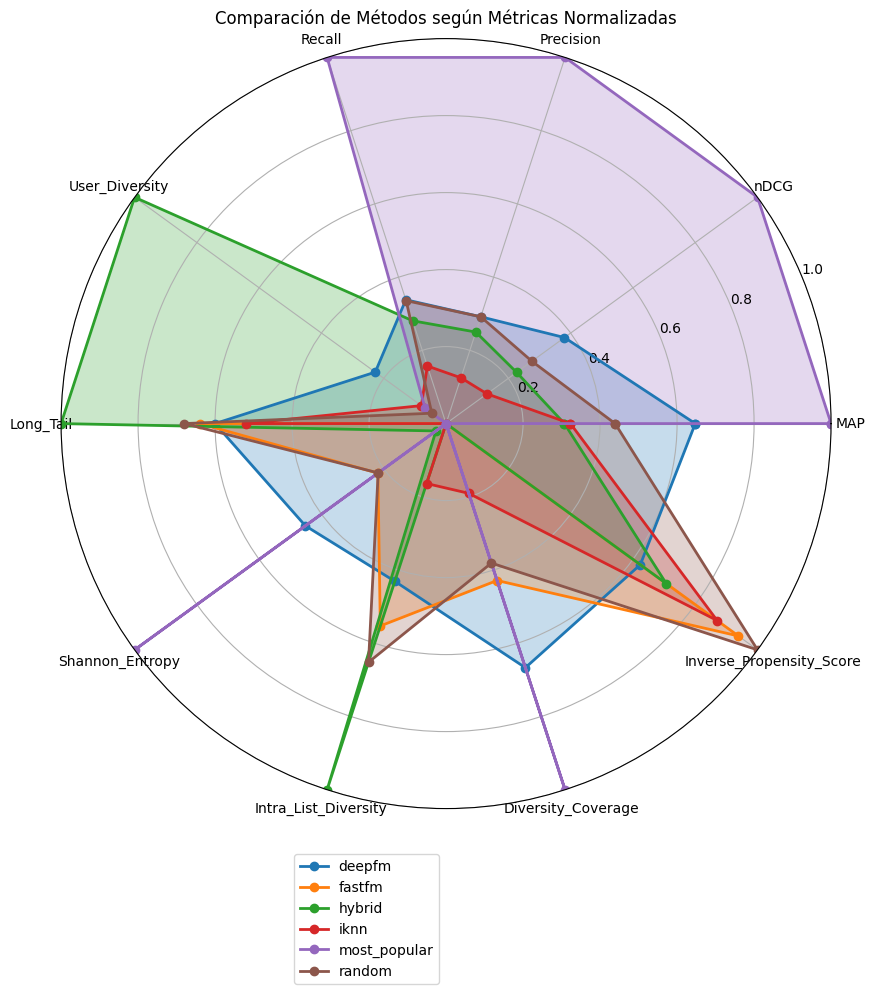

Promedios de Métricas por modelo:
              user_id     MAP    nDCG  Precision  Recall  User_Diversity  \
model                                                                      
deepfm            5.0  0.2222  0.1015     0.0818  0.0038          0.5199   
fastfm            5.0  0.0606  0.0200     0.0182  0.0006          0.3870   
hybrid            5.0  0.1374  0.0686     0.0727  0.0033          0.9717   
iknn              5.0  0.1413  0.0482     0.0455  0.0021          0.4334   
most_popular      5.0  0.3103  0.2345     0.2364  0.0101          0.4263   
random            5.0  0.1702  0.0791     0.0818  0.0038          0.4138   

              Long_Tail  Shannon_Entropy  Intra_List_Diversity  \
model                                                            
deepfm           0.1364           0.4150                0.7383   
fastfm           0.1455           0.3120                0.8333   
hybrid           0.2273           0.2295                1.1818   
iknn             0.1182    

In [51]:
# Obtener dataframe de resultados
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)

# Analisis estadistico usando nuestra funcion
analyze_global_metrics(results_df)

# Guardar dataframe de resultados
results_df.to_csv('global_metrics_results.csv', index=False)
print("DataFrame de resultados guardado en 'global_metrics_results.csv'")

Graficar ahora con distintos `top_n`para ver como se comportan las metricas de los distintos modelos.

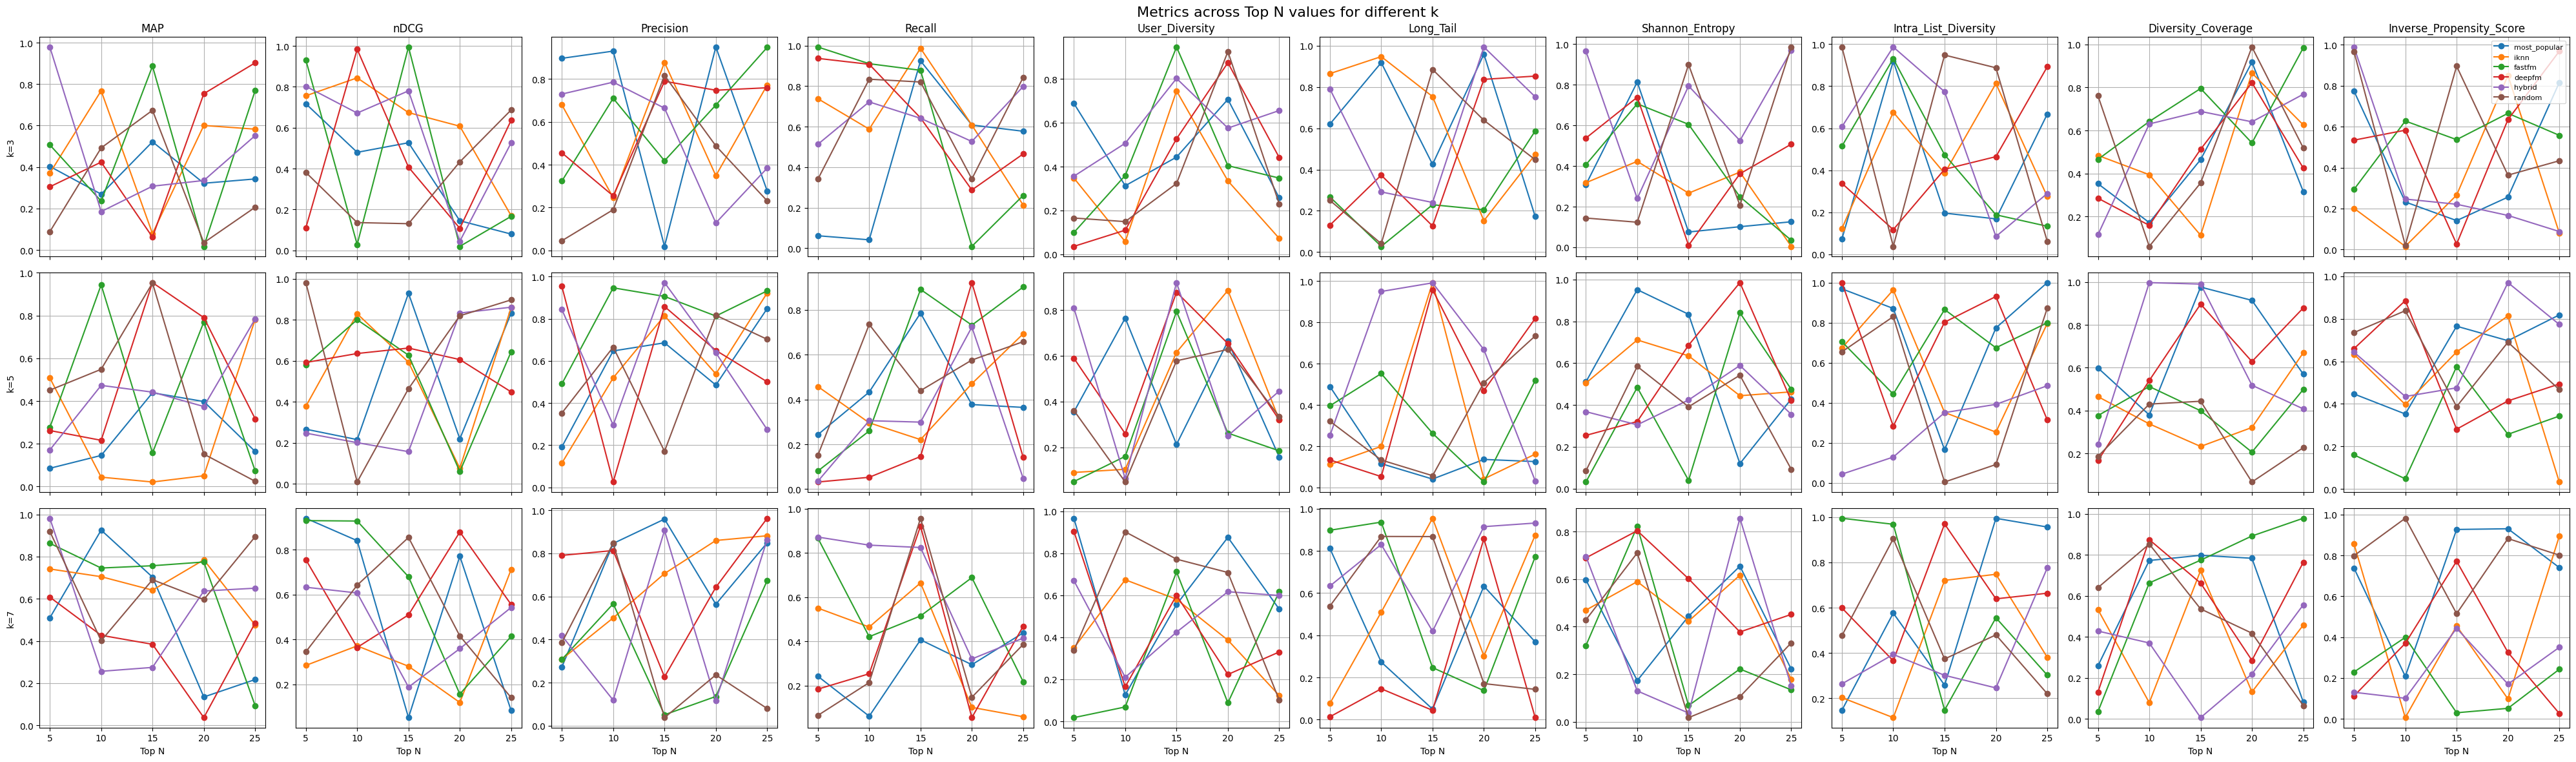

In [52]:
# Actualización de los modelos
models = ['most_popular', 'iknn', 'fastfm', 'deepfm', 'hybrid', 'random']
metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy',
           'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
top_n_list = [5, 10, 15, 20, 25]
k_category_list = [3, 5, 7]

# Crear datos simulados nuevamente para incluir los modelos actualizados
data = []
for model in models:
    for k in k_category_list:
        for top_n in top_n_list:
            values = np.random.rand(len(metrics))
            data.append([model, k, top_n] + list(values))

# Crear DataFrame actualizado
columns = ['model', 'k', 'top_n'] + metrics
df = pd.DataFrame(data, columns=columns)

# Crear figura con filas como k y columnas como métricas
fig, axes = plt.subplots(len(k_category_list), len(metrics), figsize=(40, 12), sharex=True, sharey=False)
fig.suptitle("Metrics across Top N values for different k", fontsize=16)

for i, k in enumerate(k_category_list):
    df_k = df[df['k'] == k]  # Filtrar por k

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        for model in models:
            df_model = df_k[df_k['model'] == model]
            ax.plot(df_model['top_n'], df_model[metric], label=model, marker='o')

        if i == 0:  # Títulos de las columnas (métricas)
            ax.set_title(metric)

        if j == 0:  # Etiquetas para cada fila (k)
            ax.set_ylabel(f"k={k}")

        ax.grid(True)
        if i == len(k_category_list) - 1:  # Etiqueta del eje X solo en la última fila
            ax.set_xlabel("Top N")

        if i == 0 and j == len(metrics) - 1:  # Solo una vez, agregar leyenda
            ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


## Generar Analisis Cualitativo


### Función de Análisis Cualititativo


In [80]:
def qualitative_analysis(test_data, train_data, user_id, top_n=10):
    # Obtener recomendaciones de cada método
    recommendations = {
        'Most Popular': recommend_most_popular(user_id, train_data, top_n),
        'Random': recommend_random(user_id, train_data, top_n),
        'IKNN': MusicIKNN(k=20).fit(train_data).recommend(user_id, train_data, top_n),
        'FastFM': recommend_fastfm(user_id, train_data, top_n),
        'DeepFM': recommend_deepfm(user_id, train_data, top_n),
        'Hybrid': recommend_hybrid(user_id, train_data, top_n)
    }

    # Obtener top 5 categorías para el usuario específico
    user = dict_username_reverse[user_id]
    top_k_categories = get_top_k_categories(test_data, k=5)
    user_categories = top_k_categories[top_k_categories['Username'] == user]

    # Imprimir las Top 5 Categorías para el usuario de prueba
    print(f"\nTop 5 Categorías para el usuario {user}:")
    for idx, row in user_categories.iterrows():
        print(f"Género: {row['genre']}, Conteo: {row['count']}")
    print("\n")

    # Resto del código original...
    diversity_scores = {
        method: calculate_user_diversity(top_k_categories, recs, user_id)
        for method, recs in recommendations.items()
    }

    # Crear DataFrame con recomendaciones y géneros
    all_recommendations = []
    for method, recs in recommendations.items():
        for rank, song in enumerate(recs, 1):
            # Buscar en todo el dataset musical
            song_data = music_data[music_data['artist_song'] == song]
            genre = song_data['genre'].iloc[0] if not song_data.empty else 'Unknown'

            all_recommendations.append({
                'Method': method,
                'Rank': rank,
                'Song': song,
                'Genre': genre,
                'User_Diversity_Score': 1 - diversity_scores[method]
            })

    recommendations_df = pd.DataFrame(all_recommendations)

    # Crear visualización
    print(f"Análisis Cualitativo de Recomendaciones para Usuario {dict_username_reverse[user_id]}")
    print("\nComparación de User Diversity Scores:")
    for method, score in sorted(diversity_scores.items(), key=lambda x: x[1], reverse=True):
        print(f"{method}: {score:.4f}")

    print("\nRecomendaciones Detalladas por Método:")
    return recommendations_df.sort_values(['Method', 'Rank'])

### Ejecución de Análisis Cualitativo

<ipython-input-20-d108153fc9fd>:22: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X = sparse.csc_matrix(pd.get_dummies(interaction_data[['user_id', 'artist_song']], sparse=True).values)
<ipython-input-20-d108153fc9fd>:38: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_user = sparse.csc_matrix(pd.get_dummies(user_data, sparse=True).reindex(columns=feature_columns).fillna(0).values)


Matrix shape: (11, 2738)
Input dim: 2738
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4765
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4987
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3338
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2627
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Top 5 Categorías para el usuario franhale:
Género: pop, Conteo: 184
Género: rock, Conteo: 125
Género: jazz, Conteo: 19
Género: blues, Conteo: 16
Género: country, Conteo: 10


Análisis Cualitativo de Recomendaciones para Usuario franhale

Comparación de User Diversity Scores:
Hybrid: 1.0000
DeepFM: 0.5732
Random: 0.5018
FastFM: 0.3946
Most Popular: 0.3445
IKNN: 0.1186

Recomendaciones Detalladas por Método:

Tabla Comparativa de Recomendaciones:


,Method,Rank,Song,Genre,User_Diversity_Score
40,DeepFM,1,the doors-peace frog,rock,0.426833
41,DeepFM,2,level 42-lessons in love,pop,0.426833
42,DeepFM,3,kate bush-leave it open,pop,0.426833
43,DeepFM,4,phish-stash,pop,0.426833
44,DeepFM,5,kendrick lamar-hol' up,pop,0.426833
45,DeepFM,6,sly & the family stone-stand!,rock,0.426833
46,DeepFM,7,rita ora-let you love me,pop,0.426833
47,DeepFM,8,tenor saw-ring the alarm,reggae,0.426833
48,DeepFM,9,limp bizkit-livin' it up,rock,0.426833
49,DeepFM,10,radiohead-jigsaw falling into place,rock,0.426833


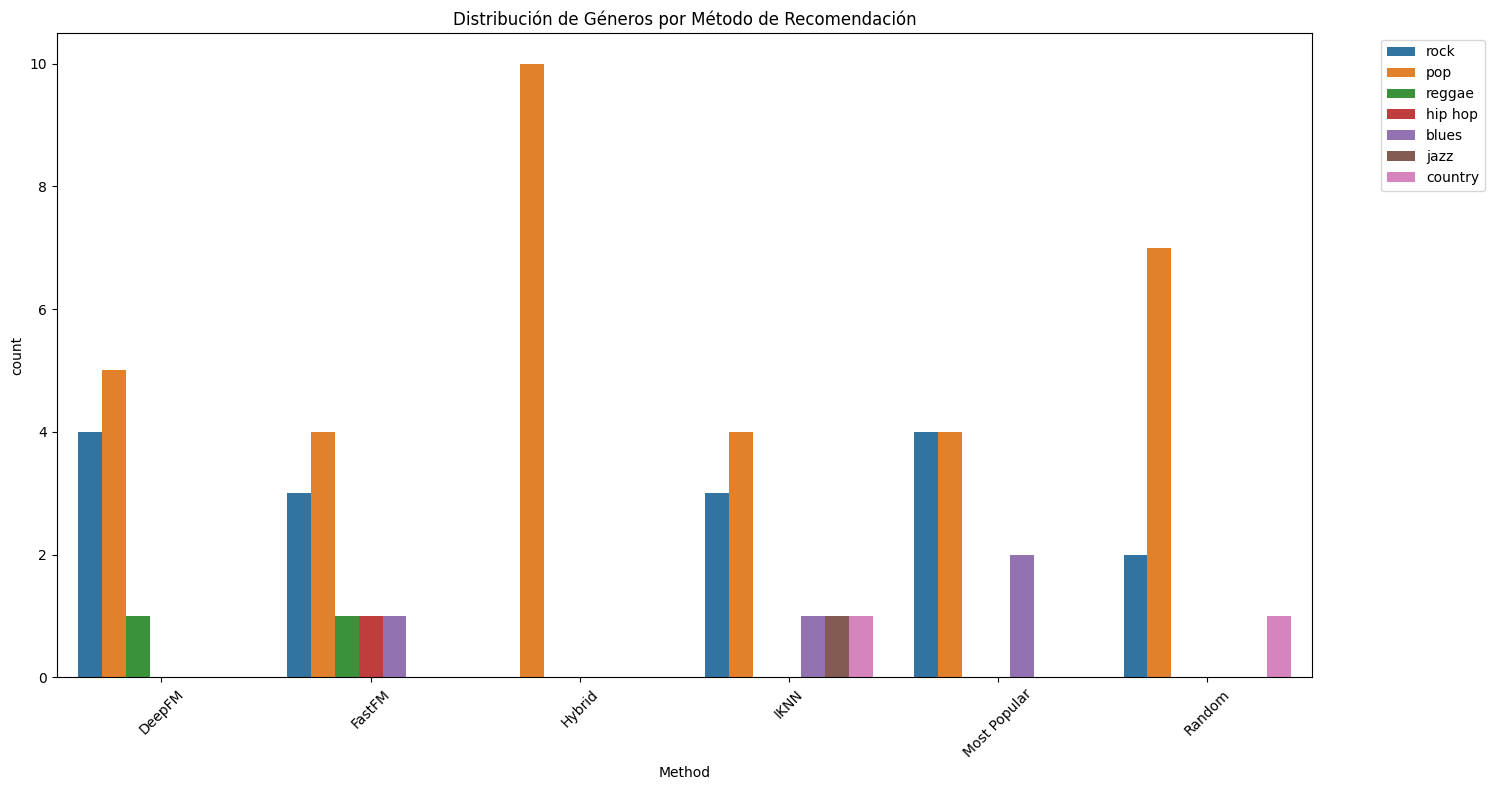

In [81]:
# Seleccionar un usuario específico para el análisis
sample_user_id = data_music_test['user_id'].iloc[0]  # Primer usuario como ejemplo

# Generar análisis cualitativo
recommendations_analysis = qualitative_analysis(
    data_music_test,
    data_music_train,
    sample_user_id,
    top_n=10
)

# Mostrar las recomendaciones en un formato tabular
print("\nTabla Comparativa de Recomendaciones:")
display(recommendations_analysis.style.background_gradient(
    subset=['User_Diversity_Score'],
    cmap='YlOrRd'
))

# Generar visualización de distribución de géneros por método
plt.figure(figsize=(15, 8))
sns.countplot(data=recommendations_analysis, x='Method', hue='Genre')
plt.title('Distribución de Géneros por Método de Recomendación')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Exportar resultados
recommendations_analysis.to_csv(f'qualitative_analysis_user_{sample_user_id}.csv', index=False)